Display screen
    Drag drop square 
        User drags image into square
        Reads image
    Screen with button: Download
        saves image into user computer
    Convert button:
        Converts image
        Display the converted image

In [2]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
        height, width, channel = originalPic.shape
        bytesPerLine = 3 * width
        convertedImage = QtGui.QImage(originalPic.data, width, height, bytesPerLine, QtGui.QImage.Format_RGB888)



             height, width, channel = originalPic.shape
        originalPic = np.require(originalPic, np.uint8, 'C')
        convertedImage = QtGui.QImage(originalPic, width, height, QtGui.QImage.Format_RGB888)



In [1]:
# PYQT Trial 
# BUILDING A SCREEN
from PyQt5.QtWidgets import QLabel, QWidget, QPushButton, QHBoxLayout, QApplication
from PyQt5.QtCore import  Qt
from PyQt5.QtGui import QPixmap, QImage
import cv2 as cv
import numpy as np 
import sys

# create class for photo viewing screen
class imageLabel(QLabel):
    def __init__(self):
        super().__init__()

        self.setText('\n\n Drop Image Here \n\n')
        self.setStyleSheet('''
            QLabel{
                border: 4px dashed #aaa
            }
        ''')

    def setPixmap(self, image) :
        super().setPixmap(image)

# provides the basic application constructor
class crtnfyApp(QWidget) :
    def __init__(self) :
        super().__init__()
        self.resize(500,550)
        self.setWindowTitle('Cartoonify')
        self.setAcceptDrops(True)
        self.setUp()

    def setUp(self):    

        #temp file path
        file_path = '../triali.png'

        # make buttons (set with self to access wherever in class )
        self.crtnfy_btn = QPushButton('Cartoonify')
        self.dwnld_btn = QPushButton('Download')        
        # make drop screen widget
        self.photoViewer = imageLabel()
        
        # create layout
        layout = QHBoxLayout() 
        # add buttons and photoviewer to layout
        layout.addWidget(self.crtnfy_btn, 1) # second argument indicates proportion 
        layout.addWidget(self.dwnld_btn, 1)
        layout.addWidget(self.photoViewer, 8)

        # add layout to class
        self.setLayout(layout)

        # listen to buttons (¿what happens if they are pressed?)
        self.dwnld_btn.clicked.connect(self.dwnldImage)
        self.crtnfy_btn.clicked.connect(self.crtnfyImage)
    
    def dragEnterEvent(self, event):
        if event.mimeData().hasImage:
            event.accept()
        else:
            event.ignore()
        
    def dragMoveEvent(self, event):
        if event.mimeData().hasImage:
            event.accept()
        else:
            event.ignore()

    def dropEvent(self, event):
        if event.mimeData().hasImage:
            event.setDropAction(Qt.CopyAction)
            file_path = event.mimeData().urls()[0].toLocalFile()
            self.set_image(file_path)
            event.accept()
            print(file_path)
        else:
            event.ignore()
    
    def set_image(self, file_path):
        # QPixmap used to load image
        self.photoViewer.setPixmap(QPixmap(file_path))

    def dwnldImage(self):
        self.photoViewer.setPixmap(QPixmap('../triali.png'))

    def crtnfyImage(self, file_path):
        originalPic = cv.imread(str(file_path))
        originalPic = cv.cvtColor(originalPic, cv.COLOR_BGR2RGB)

        #converting an image to grayscale
        grayScaleImage = cv.cvtColor(originalPic, cv.COLOR_BGR2GRAY)
        #applying median blur to smoothen an image
        smoothGrayScale = cv.medianBlur(grayScaleImage, 5)
        #retrieving the edges for cartoon effect
        #by using thresholding technique
        getEdge = cv.adaptiveThreshold(smoothGrayScale, 255, 
        cv.ADAPTIVE_THRESH_MEAN_C, 
        cv.THRESH_BINARY, 9, 9)

        #applying bilateral filter to remove noise 
        #and keep edge sharp as required
        colorImage = cv.bilateralFilter(originalPic, 9, 300, 300)
        #masking edged image with our "BEAUTIFY" image
        cartoonImage = cv.bitwise_and(colorImage, colorImage, mask=getEdge)
        ReSized6 = cv.resize(cartoonImage, (960, 540))

        height, width, channel = cartoonImage.shape
        bytesPerLine = 3 * width
        convertedImage= QImage(cartoonImage.tobytes(), width, height, bytesPerLine, QImage.Format_RGB888).rgbSwapped()
   
        self.photoViewer.setPixmap(QPixmap(convertedImage))

if __name__ == '__main__':
    # create application object
    app = QApplication(sys.argv)

    windows = crtnfyApp()
    windows.show()  

    try:
        sys.exit(app.exec_())
    except SystemExit:
        print('Closing window...')



2022-10-11 19:14:50.253 Python[21876:1142445] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/m6/hdvcc7791jx1bd9d61b94drc0000gp/T/org.python.python.savedState


/Users/cash/Desktop/Captura de pantalla 2022-04-20 a las 13.46.29.png
/Users/cash/Desktop/Captura de pantalla 2022-04-18 a las 9.39.12.png
/Users/cash/Desktop/Captura de pantalla 2022-04-18 a las 9.38.47.png
/Users/cash/Desktop/Captura de pantalla 2022-04-18 a las 9.38.22.png
/Users/cash/Desktop/Captura de pantalla 2022-10-04 a las 19.00.42.png
/Users/cash/Desktop/Captura de pantalla 2022-03-08 a las 11.00.49.png


KeyboardInterrupt: 

In [ ]:
        originalPic = cv.imread(str(file_path))
        originalPic = cv.cvtColor(originalPic, cv.COLOR_BGR2RGB)

        # converting an image to grayscale
        grayScaleImage = cv.cvtColor(originalPic, cv.COLOR_BGR2GRAY)
        # applying median blur to smoothen an image
        smoothGrayScale = cv.medianBlur(grayScaleImage, 5)
        # retrieving the edges for cartoon effect by using thresholding technique
        getEdge = cv.adaptiveThreshold(smoothGrayScale, 255, 
        cv.ADAPTIVE_THRESH_MEAN_C, 
        cv.THRESH_BINARY, 9, 9)

        # applying bilateral filter to remove noise 
        # and keep edge sharp as required
        colorImage = cv.bilateralFilter(originalPic, 9, 300, 300)
        #masking edged image with our "BEAUTIFY" image
        cartoonImage = cv.bitwise_and(colorImage, colorImage, mask=getEdge)
        ReSized6 = cv.resize(cartoonImage, (960, 540))

        self.photoViewer.setPixmap(QtGui.QPixmap(cartoonImage))

In [ ]:
/Users/cash/Desktop/Captura de pantalla 2022-04-18 a las 9.38.47.png
/Users/cash/Desktop/Captura de pantalla 2022-04-18 a las 9.38.22.png
/Users/cash/Desktop/Captura de pantalla 2022-10-04 a las 19.00.42.png
/Users/cash/Desktop/Captura de pantalla 2022-03-08 a las 11.00.49.png

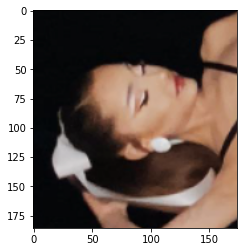

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

path = '/Users/cash/Desktop/Captura de pantalla 2022-04-18 a las 9.38.22.png'

original = cv.imread(path)
originalPic = cv.cvtColor(original, cv.COLOR_BGR2RGB)
plt.imshow(originalPic)

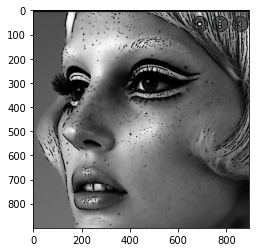

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
path = '../triali.png'


# How to cartoonify an image using cv 
original = cv.imread(path)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
#converting an image to grayscale
grayScaleImage = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
#applying median blur to smoothen an image
smoothGrayScale = cv.medianBlur(grayScaleImage, 5)
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv.adaptiveThreshold(smoothGrayScale, 255, 
  cv.ADAPTIVE_THRESH_MEAN_C, 
  cv.THRESH_BINARY, 9, 9)

#applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv.bilateralFilter(original, 9, 300, 300)
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv.resize(cartoonImage, (960, 540))

plt.imshow(cartoonImage)